Movielens Case Study

DESCRIPTION

Background of Problem Statement :

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. Members of the GroupLens Research Project are involved in many research projects related to the fields of information filtering, collaborative filtering, and recommender systems. The project is led by professors John Riedl and Joseph Konstan. The project began to explore automated collaborative filtering in 1992 but is most well known for its worldwide trial of an automated collaborative filtering system for Usenet news in 1996. Since then the project has expanded its scope to research overall information by filtering solutions, integrating into content-based methods, as well as, improving current collaborative filtering technology.

Problem Objective :

Here, we ask you to perform the analysis using the Exploratory Data Analysis technique. You need to find features affecting the ratings of any particular movie and build a model to predict the movie ratings.

Domain: Entertainment

Analysis Tasks to be performed:

1. Import the three datasets

2.  Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)

3. Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
    User Age Distribution
    User rating of the movie “Toy Story”
    Top 25 movies by viewership rating
    Find the ratings for all the movies reviewed by for a particular user of user id = 2696

4. Feature Engineering:
            Use column genres:

        Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)

        Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 

        Determine the features affecting the ratings of any particular movie.

        Develop an appropriate model to predict the movie ratings

Dataset Description :

These files contain 1,000,209 anonymous ratings of approximately 3,900 movies made by 6,040 MovieLens users who joined MovieLens in 2000.

Ratings.dat
    Format - UserID::MovieID::Rating::Timestamp

Field	Description
UserID	Unique identification for each user
MovieID	Unique identification for each movie
Rating	User rating for each movie
Timestamp	Timestamp generated while adding user review
UserIDs range between 1 and 6040 
The MovieIDs range between 1 and 3952
Ratings are made on a 5-star scale (whole-star ratings only)
A timestamp is represented in seconds since the epoch is returned by time(2)
Each user has at least 20 ratings
 

Users.dat
Format -  UserID::Gender::Age::Occupation::Zip-code

Field	Description
UserID	Unique identification for each user
Genere	Category of each movie
Age	User’s age
Occupation	User’s Occupation
Zip-code	Zip Code for the user’s location
All demographic information is provided voluntarily by the users and is not checked for accuracy. Only users who have provided demographic information are included in this data set.

Gender is denoted by an "M" for male and "F" for female
Age is chosen from the following ranges:
 

Value	Description
1	"Under 18"
18	"18-24"
25	"25-34"
35	"35-44"
45	"45-49"
50	"50-55"
56	"56+"
 

Occupation is chosen from the following choices:
Value
 	Description
0	"other" or not specified
1	"academic/educator"
2	"artist”
3	"clerical/admin"
4	"college/grad student"
5	"customer service"
6	"doctor/health care"
7	"executive/managerial"
8	"farmer"
9	"homemaker"
10	"K-12 student"
11	"lawyer"
12	"programmer"
13	"retired"
14	 "sales/marketing"
15	"scientist"
16	 "self-employed"
17	"technician/engineer"
18	"tradesman/craftsman"
19	"unemployed"
20	"writer”

Movies.dat
Format - MovieID::Title::Genres

Field	Description
MovieID	Unique identification for each movie
Title	A title for each movie
Genres	Category of each movie
 

 Titles are identical to titles provided by the IMDB (including year of release)
 

Genres are pipe-separated and are selected from the following genres:
Action
Adventure
Animation
Children's
Comedy
Crime
Documentary
Drama
Fantasy
Film-Noir
Horror
Musical
Mystery
Romance
Sci-Fi
Thriller
War
Western
Some MovieIDs do not correspond to a movie due to accidental duplicate entries and/or test entries
Movies are mostly entered by hand, so errors and inconsistencies may exist
 

 

Please download the dataset from here 

Good Luck!!
 

###################################################################################################################

Solution

###################################################################################################################

In [130]:
# if any error happened during import please run the below commands
#!pip install lightgbm
#!pip install xgboost

1. Import the three datasets

In [129]:
#importing pandas dataframe
import pandas as pd

#importing matplolib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

#importing reg-ex
import re

#Hold out method for splitting data
from sklearn.model_selection import train_test_split

#importing accuracy_score 
from sklearn.metrics import accuracy_score 

#importing LGBMClassifier 
from lightgbm import LGBMClassifier

#importing xgboost
import xgboost


In [14]:
moviesDataFrame = pd.read_csv('Data/movies.dat',sep="::",header=None,names=["MovieID","Title","Genres"],engine='python',index_col=False)
moviesDataFrame.set_index('MovieID', drop=True)
moviesDataFrame.head(10)

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [15]:
ratingsDataFrame = pd.read_csv('Data/ratings.dat',sep="::",header=None,names=["UserID","MovieID","Rating","Timestamp"],engine='python',index_col=False)
#ratingsDataFrame.set_index('Id', drop=True)
ratingsDataFrame.head(10)

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [16]:
usersDataFrame = pd.read_csv('Data/users.dat',sep="::",header=None,names=["UserID","Gender","Age","Occupation","Zip-code"],engine='python',index_col=False)
#ratingsDataFrame.set_index('Id', drop=True)
usersDataFrame.head(10)

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
5,6,F,50,9,55117
6,7,M,35,1,06810
7,8,M,25,12,11413
8,9,M,25,17,61614
9,10,F,35,1,95370


2.  Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)

In [17]:
masterDataFrame = moviesDataFrame.merge(ratingsDataFrame, how="inner", on="MovieID")
masterDataFrame = masterDataFrame.merge(usersDataFrame, how="inner", on="UserID")
masterDataFrame.dropna(inplace=True)
masterDataFrame.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


3. Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
    
    User Age Distribution

    User rating of the movie “Toy Story”

    Top 25 movies by viewership rating
    
    Find the ratings for all the movies reviewed by for a particular user of user id = 2696

User Age Distribution

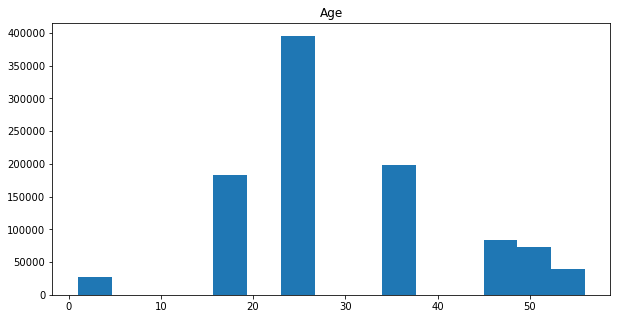

In [64]:
_=masterDataFrame.hist('Age', bins=15,figsize=(10,5),grid=False)


User rating of the movie “Toy Story”

In [47]:
filteredDataFrame = masterDataFrame[masterDataFrame.MovieID.eq(1)]
sortedDataframe= filteredDataFrame.sort_values( ["Title","UserID","Rating"],ascending=True)
sortedDataframe[["Title","Rating","UserID"]].head(25)


,Title,Rating,UserID
0,Toy Story (1995),5,1
53,Toy Story (1995),4,6
124,Toy Story (1995),4,8
263,Toy Story (1995),5,9
369,Toy Story (1995),5,10
770,Toy Story (1995),4,18
1075,Toy Story (1995),5,19
1330,Toy Story (1995),3,21
1352,Toy Story (1995),4,23
1656,Toy Story (1995),3,26


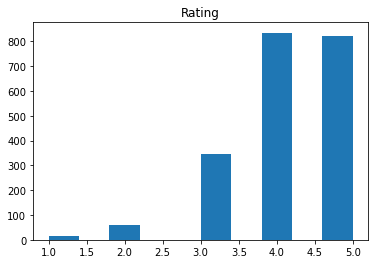

In [65]:
_=filteredDataFrame.hist("Rating", bins=10,grid=False)

Top 25 movies by viewership rating

In [76]:
top25MoviesDataFrame= masterDataFrame.groupby(["MovieID","Title"]).Rating.count().sort_values(ascending=False)
top25MoviesDataFrame.head(25)

MovieID  Title                                                
2858     American Beauty (1999)                                   3428
260      Star Wars: Episode IV - A New Hope (1977)                2991
1196     Star Wars: Episode V - The Empire Strikes Back (1980)    2990
1210     Star Wars: Episode VI - Return of the Jedi (1983)        2883
480      Jurassic Park (1993)                                     2672
2028     Saving Private Ryan (1998)                               2653
589      Terminator 2: Judgment Day (1991)                        2649
2571     Matrix, The (1999)                                       2590
1270     Back to the Future (1985)                                2583
593      Silence of the Lambs, The (1991)                         2578
1580     Men in Black (1997)                                      2538
1198     Raiders of the Lost Ark (1981)                           2514
608      Fargo (1996)                                             2513
2762     Sixth

Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [82]:
userMoviesDataFrame = masterDataFrame[masterDataFrame["UserID"].eq(2696)]
userMoviesDataFrame

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
991035,350,"Client, The (1994)",Drama|Mystery|Thriller,2696,3,973308886,M,25,7,24210
991036,800,Lone Star (1996),Drama|Mystery,2696,5,973308842,M,25,7,24210
991037,1092,Basic Instinct (1992),Mystery|Thriller,2696,4,973308886,M,25,7,24210
991038,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696,3,973308690,M,25,7,24210
991039,1258,"Shining, The (1980)",Horror,2696,4,973308710,M,25,7,24210
991040,1270,Back to the Future (1985),Comedy|Sci-Fi,2696,2,973308676,M,25,7,24210
991041,1589,Cop Land (1997),Crime|Drama|Mystery,2696,3,973308865,M,25,7,24210
991042,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,2696,4,973308842,M,25,7,24210
991043,1625,"Game, The (1997)",Mystery|Thriller,2696,4,973308842,M,25,7,24210
991044,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,2696,2,973308920,M,25,7,24210


4. Feature Engineering: Use column genres

        


Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)

        

In [101]:
GenereList = masterDataFrame.Genres.tolist()
filteredList = []
i = 0
while(i<len(GenereList)):
    filteredList+= GenereList[i].split('|')
    i+=1

uniqueList = list(set(filteredList))
uniqueList

['Western',
 'Fantasy',
 'Action',
 'Musical',
 'Sci-Fi',
 'War',
 'Romance',
 'Thriller',
 'Horror',
 'Comedy',
 "Children's",
 'Drama',
 'Mystery',
 'Documentary',
 'Crime',
 'Animation',
 'Adventure',
 'Film-Noir']

Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 

        

In [109]:
masterDataFrameClone = masterDataFrame.copy()
masterDataFrameClone

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,958489970,M,25,4,92843
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,958489970,M,25,4,92843
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,958489902,M,25,4,92843
1000207,3555,U-571 (2000),Action|Thriller,5727,3,958490699,M,25,4,92843


In [111]:
masterDataFrameClone=pd.concat([masterDataFrameClone,masterDataFrameClone.Genres.str.get_dummies()],axis=1)
masterDataFrameClone

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,...,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,...,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,958489970,M,25,4,92843,...,0,0,0,0,0,0,0,1,0,0
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,958489970,M,25,4,92843,...,0,0,1,0,0,0,0,1,0,0
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,958489902,M,25,4,92843,...,0,0,0,0,0,1,0,0,0,0
1000207,3555,U-571 (2000),Action|Thriller,5727,3,958490699,M,25,4,92843,...,0,0,0,0,0,0,0,1,0,0


Determine the features affecting the ratings of any particular movie.

       

In [134]:
x = masterDataFrameClone.drop(['UserID','MovieID','Rating','Title', 'Genres', 'Gender', 'Zip-code'],axis=1)
x.shape

(1000209, 21)

In [136]:
y = masterDataFrameClone.Rating
y.shape

(1000209,)

In [137]:

x.Occupation.value_counts()

4     131032
0     130499
7     105425
1      85351
17     72816
20     60397
12     57214
2      50068
14     49109
16     46021
6      37205
3      31623
10     23290
15     22951
5      21850
11     20563
19     14904
13     13754
18     12086
9      11345
8       2706
Name: Occupation, dtype: int64

In [138]:
x = x.join(pd.get_dummies(x.Occupation,prefix='Occupation'))
x.head(),x.columns

(   Timestamp  Age  Occupation  Action  Adventure  Animation  Children's  \
 0  978824268    1          10       0          0          1           1   
 1  978824351    1          10       0          0          1           1   
 2  978301777    1          10       0          0          0           0   
 3  978300760    1          10       1          1          0           0   
 4  978824195    1          10       0          0          0           0   
 
    Comedy  Crime  Documentary  ...  Occupation_11  Occupation_12  \
 0       1      0            0  ...              0              0   
 1       0      0            0  ...              0              0   
 2       0      0            0  ...              0              0   
 3       0      0            0  ...              0              0   
 4       0      0            0  ...              0              0   
 
    Occupation_13  Occupation_14  Occupation_15  Occupation_16  Occupation_17  \
 0              0              0             

Develop an appropriate model to predict the movie ratings

In [139]:

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 10,stratify=y)

In [140]:

lgb = LGBMClassifier(boosting_type = 'gbdt',n_jobs= -1,objective='multiclass')

In [141]:
lgb.fit(x_train,y_train)


LGBMClassifier(objective='multiclass')

In [142]:
y_pred = lgb.predict(x_test)

In [143]:
print('LGBM accuracy score is : ', accuracy_score(y_test,y_pred)*100)

LGBM accuracy score is :  37.37865048339849


In [144]:
xgb = xgboost.XGBClassifier(n_jobs=-1)

In [145]:
xgb.fit(x_train,y_train)

[15:41:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [146]:
y_pred_xgb = xgb.predict(x_test)

In [147]:
print('XGB accuracy score is : ', accuracy_score(y_test,y_pred_xgb )*100)

XGB accuracy score is :  38.45892362603853
